In [11]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from FunXSpectra import FunXSpectra
from relleno_zeros import relleno_zeros

In [12]:
#direccion completa del archivo a cargar
nc_file=r"G:\My Drive\UTFSM\memoria\tareas\tarea03\tst\out_03\layer01_ts.nc"

nc_data=xr.open_dataset(nc_file)
# ver contenidos archivo nc (grd)
with nc_data as ds:
  print(ds.keys())

KeysView(<xarray.Dataset>
Dimensions:         (grid_npoints: 2, time: 3602)
Coordinates:
  * time            (time) datetime64[ns] 1970-01-01 ... 1970-01-01T01:00:01....
Dimensions without coordinates: grid_npoints
Data variables:
    deformed_bathy  (grid_npoints) float64 ...
    longitude       (grid_npoints) float64 ...
    latitude        (grid_npoints) float64 ...
    min_height      (grid_npoints) float64 ...
    max_height      (grid_npoints) float64 ...
    eta             (time, grid_npoints) float64 ...
    ux              (time, grid_npoints) float64 ...
    uy              (time, grid_npoints) float64 ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Time series output of TsunamiHySEA model
    creator_name:                   EDANYA Group
    institution:                    University of Malaga
    comments:                       No paper
    references:                     http://path.to.paper/paper.pdf
    history:             

## plotear boyas

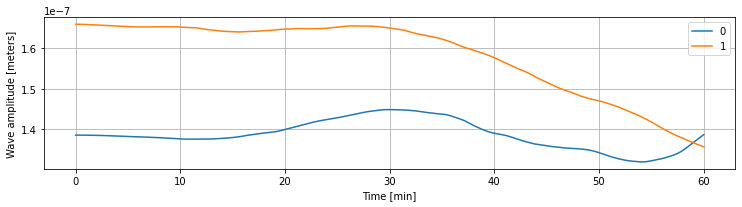

In [9]:
boyas_sel=[0,1] #seleccionar boyas a plotear

time_min=(nc_data.time-nc_data.time[0])/ pd.Timedelta("1m")
nc_data = nc_data.assign_coords(time_min=("time", time_min))

#ployea series seleccionadas
nc_data.eta.isel(grid_npoints=boyas_sel).plot.line(x="time_min",aspect=3.5,size=3)
plt.legend(boyas_sel)
plt.tight_layout()
plt.grid()
xlabel=plt.xlabel('Time [min]')

## Espectros

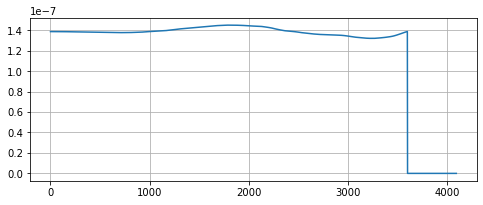

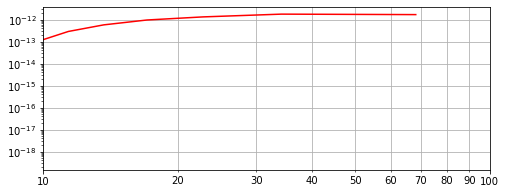

In [7]:
#Espectros
boya_1=0
boya_2=0

y1=nc_data.eta.isel(grid_npoints=boya_1)
y2=nc_data.eta.isel(grid_npoints=boya_2)

y1=relleno_zeros(y1) #rellena con ceros hasta la siguiente potencia de dos
y2=relleno_zeros(y2)

fig1,ax1=plt.subplots(figsize=(8,3))
ax1.plot(y1)
ax1.grid()

f,S1,S2,coh2,phase,bw=FunXSpectra(y1,y2,1,4,0)

fig2,ax2=plt.subplots(figsize=(8,3))
plt.xlim(10,100)
ax2.yaxis.grid(which="major")
ax2.xaxis.grid(which="both")

ax2.loglog(1/f/60,S1,color='r')

ax2.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax2.xaxis.set_minor_formatter(mtick.ScalarFormatter())


## Comparar espectros de varios archivos distintos

In [58]:
##inputs

# comparar espectros de dos archivos distintos
nc_file1=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\HySea\mw75\4l\24h\layer01_ts.nc"
nc_file2=r"C:\Users\madia\Desktop\layer01_85_ts.nc"

# archivo con espectro de fondo'
bg_file=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Tareas\tarea02\background_spectra\bg_coqu_24h.npz"

nc_files=[nc_file1,nc_file2] #lista con archivos a analizar
localidades=['coqu','valp'] #aqui anotar a que localidad corresponde cada boya. en orden
etiquetas=['Mw7.5','Mw8.5','Fondo'] #para darle etiqueta con ax.legends

boya_sel=0 ###seleccionar boyas a plotear

bg_coqu_24h.npz


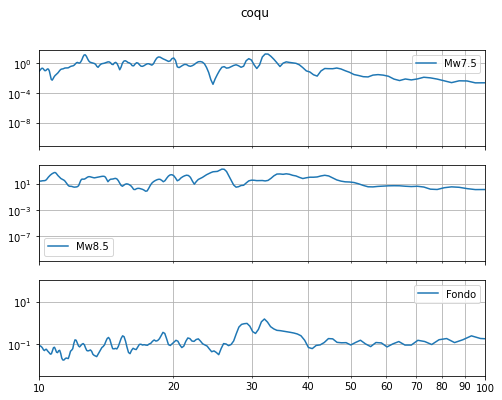

In [59]:
S_list=[] #listas vacias en donde se guardaran los espectros de cada archivo (tsunamis y fondo)
f_list=[] # listas vacias en donde se guardaran los espectros de cada archivo (tsunamis y fondo)

for i in range(len(nc_files)): # para cada archivo nc de la lista nc_files
    nc_data=xr.open_dataset(nc_files[i]) # carga un archivo
    y1=nc_data.eta.isel(grid_npoints=boya_sel) # y1 e y2 de las series para hacer analisis espectral
    y2=nc_data.eta.isel(grid_npoints=boya_sel)
    y1=relleno_zeros(y1) # rellena con ceros hasta la siguiente potencia de dos
    y2=relleno_zeros(y2)
    f,S1,S2,coh2,phase,bw=FunXSpectra(y1,y2,1,4,0)
    
    S_list.append(S1) # guarda S[i] en lista S_list
    f_list.append(f) # guarda f[i] en lista f_list
    
bg_data=np.load(bg_file) # carga archivo con espectro de fondo
S_list.append(bg_data['S']) # agrega S de fondo a la lista S_list
f_list.append(bg_data['f']) # agrega f de fondo a la lista f_list

print(os.path.basename(bg_file)) # solo para verificar el archivo de espectro de fondo que se está leyendo

#plotea
nplots=len(nc_files)+1 # cantidad de graficos (cantidad de archivos .nc + espectro de fondo)
fig, axes = plt.subplots(nrows=nplots, figsize=(8,2*nplots), sharex=True) # nploteos, cada uno con 2 de altura, y comparten solo el eje x
fig.suptitle(localidades[boya_sel]) # titulo

for i, ax in enumerate(axes.flatten()): # para cada ploteo (esta forma de iterar la encontre en internet, no se muy bien como funciona, pero funciona)
    ax.loglog(1/f_list[i]/60,S_list[i]) # loglog, de la sublista i de la lista f_list
    
    # de aqui para abajo es configuracion de los ploteos
    ax.yaxis.grid(which="major") # grilla mayor en y
    ax.xaxis.grid(which="both") # ambas grillas en x
    ax.legend([etiquetas[i]]) #etiqueta de cada grafico
    ax.xaxis.set_major_formatter(mtick.ScalarFormatter()) #deja valores de grilla mayor en formato decimal
    ax.xaxis.set_minor_formatter(mtick.ScalarFormatter()) #deja valores de grilla menor en formato decimal
    
plt.xlim(10,100) # interesan solo los periodos entre 10 y 100 min (tsunamis)
plt.show() # mostrar grafico xd
